In [ ]:
import os
import re
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('../input/frames'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
from IPython.display import clear_output, Image, display
%matplotlib inline               

# **Getting Image Frames:**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
    video = cv2.VideoCapture('/content/drive/MyDrive/drive3.mp4')
    fps = video.get(cv2.CAP_PROP_FPS)
    i = 0.
    col_images = []
    frame_times = []

    while video.isOpened():
        ret, frame = video.read()
        if ret:
            new_h=270
            new_w=480
            resize = cv2.resize(frame, (new_w, new_h))
            col_images.append(resize)
            frame_times.append(i)
            i += 0.05
            video.set(1, round(i * fps))
        else:
            video.release()
            break
    

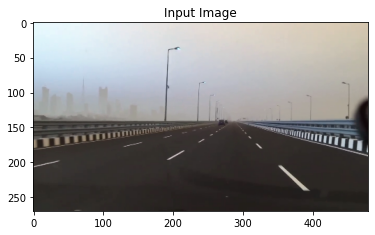

In [ ]:
plt.imshow(col_images[30][:,:,:])
plt.title("Input Image")
plt.show()

In [ ]:
len(col_images)

613

# Obtaining the gray-scale of the image:

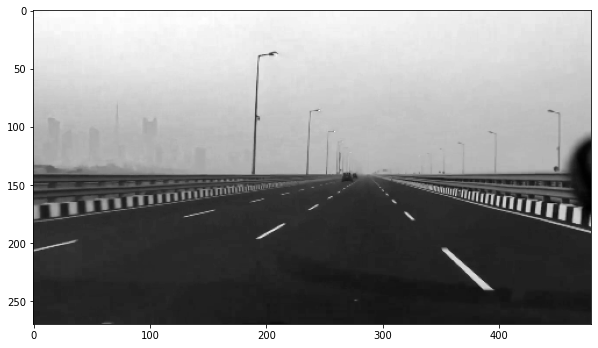

In [ ]:
# specify frame index
idx = 30

# plot frame
plt.figure(figsize=(10,10))
plt.imshow(col_images[idx][:,:,0], cmap= "gray")
plt.show()

In [ ]:
  height, width = col_images[idx][:,:,0].shape[:2]

In [ ]:
col_images[0].shape

(270, 480, 3)

# Frame Mask Creation

In [ ]:
# create a zero array
stencil = np.zeros_like(col_images[30][:,:,0])

# specify coordinates of the polygon
polygon = np.array([[50,270], [220,160], [360,160], [480,270]])

# fill polygon with ones
cv2.fillConvexPoly(stencil, polygon, 1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 1]], dtype=uint8)

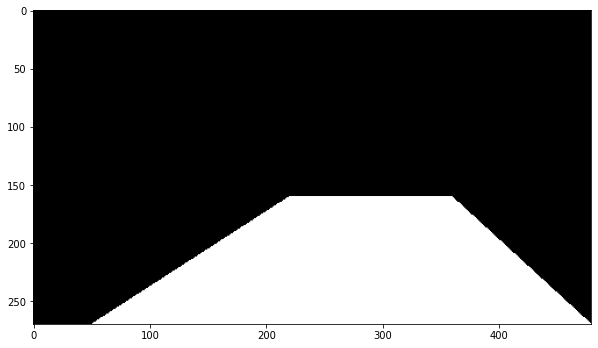

In [ ]:
# plot polygon
plt.figure(figsize=(10,10))
plt.imshow(stencil, cmap= "gray")
plt.show()

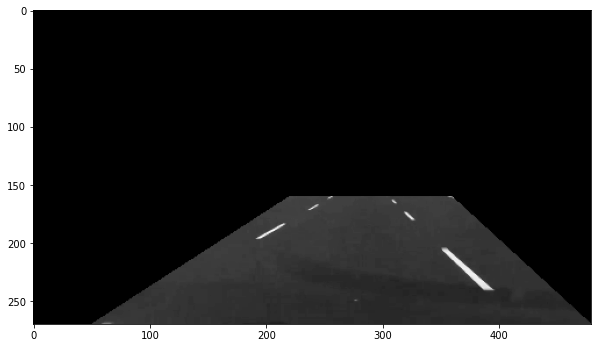

In [ ]:
# apply polygon as a mask on the frame
img = cv2.bitwise_and(col_images[idx][:,:,0], col_images[idx][:,:,0], mask=stencil)

# plot masked frame
plt.figure(figsize=(10,10))
plt.imshow(img, cmap= "gray")
plt.show()

In [ ]:
img.shape

(270, 480)

# Image Segmentation

In digital image processing, thresholding is the simplest method of segmenting images. From a grayscale image, thresholding can be used to create binary images.

# Python | cv2 threshold() Method
1.   src:Input Grayscale Image array. 
2.   thresholdValue: Mention that value which is used to classify the pixel values.
3.   maxVal: The value to be given if pixel value is more than (sometimes less than) the threshold value. 
4.   thresholdingTechnique: The type of thresholding to be applied. 
 cv2.THRESH_BINARY: If pixel intensity is greater than the set threshold, value set to 255, else set to 0 (black).

 


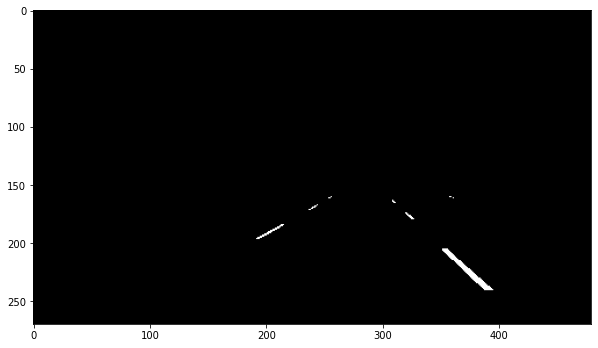

In [ ]:
# apply image thresholding
ret, thresh = cv2.threshold(img, 130, 145, cv2.THRESH_BINARY)

# plot image
plt.figure(figsize=(10,10))
plt.imshow(thresh, cmap= "gray")
plt.show()



In [ ]:
thresh

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

Hough Transform is a popular technique to detect any shape, if you can represent that shape in mathematical form.Any line can be represented in these two terms, (\r, \theta).First parameter, Input image should be a binary image, so apply we applied image threshold. Second and third parameters are \(\r) and \(\theta\) accuracies respectively. Fourth argument is the threshold, which means the minimum vote it should get to be considered as a line. 

In [ ]:
lines

array([[[354, 205, 389, 240]],

       [[356, 205, 391, 240]],

       [[309, 163, 383, 235]],

       [[355, 205, 390, 240]],

       [[367, 215, 394, 240]],

       [[192, 196, 255, 161]],

       [[353, 207, 388, 240]]], dtype=int32)

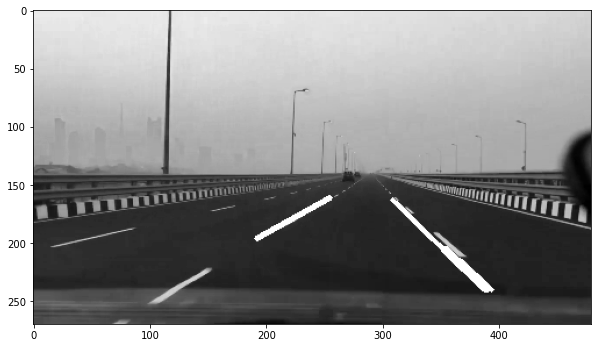

In [ ]:
lines = cv2.HoughLinesP(thresh, 1, np.pi/180, 30, maxLineGap=200)

# create a copy of the original frame
dmy = col_images[20][:,:,0].copy()

# draw Hough lines
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(dmy, (x1, y1), (x2, y2), (255, 0, 0), 3)

# plot frame
plt.figure(figsize=(10,10))
plt.imshow(dmy, cmap= "gray")
plt.show()

[1.0, 1.0, 0.972972972972973, 1.0, 0.9259259259259259, 0.9428571428571428, 1.0, 1.0, 0.972972972972973, 1.0, 0.9259259259259259, 0.9428571428571428, 0.7264957264957265, 0.7299270072992701, 0.7248322147651006, 0.7333333333333333, 0.7317073170731707, 0.7264957264957265, 0.7299270072992701, 0.7248322147651006, 0.7333333333333333, 0.7317073170731707, 0.7264957264957265, 0.7299270072992701, 0.7248322147651006, 0.7333333333333333, 0.7317073170731707, 0.7264957264957265, 0.7299270072992701, 0.7248322147651006, 0.7333333333333333, 0.7317073170731707, 0.7264957264957265, 0.7299270072992701, 0.7248322147651006, 0.7333333333333333, 0.7317073170731707, 0.7264957264957265, 0.7299270072992701, 0.7248322147651006, 0.7333333333333333, 0.7317073170731707, 0.7264957264957265, 0.7299270072992701, 0.7248322147651006, 0.7333333333333333, 0.7317073170731707, 0.7264957264957265, 0.7299270072992701, 0.7248322147651006, 0.7333333333333333, 0.7317073170731707]


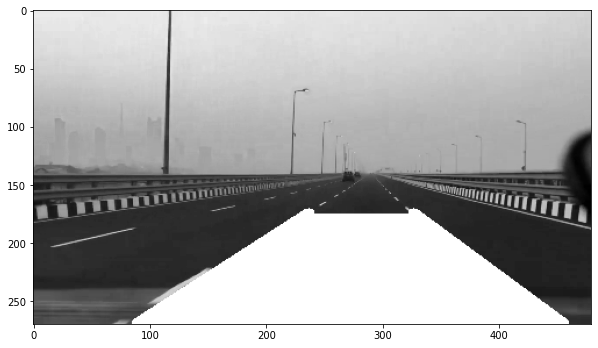

In [ ]:
dmy = col_images[20][:,:,0].copy()
img= draw_lines(dmy,lines)
plt.figure(figsize=(10,10))
plt.imshow(dmy, cmap= "gray")
plt.show()

In [ ]:
rightSlope, leftSlope, rightIntercept, leftIntercept = [],[],[],[]
def draw_lines(img, lines, thickness=5):
    global rightSlope, leftSlope, rightIntercept, leftIntercept
    rightColor=[255,255,255]    
    leftColor=[255,255,255]
    
    #this is used to filter out the outlying lines that can affect the average
    #We then use the slope we determined to find the y-intercept of the filtered lines by solving for b in y=mx+b
    for line in lines:
        for x1,y1,x2,y2 in line:
            slope = (y1-y2)/(x1-x2)
            if slope > 0.3:
                    yintercept = y2 - (slope*x2)
                    rightSlope.append(slope)
                    rightIntercept.append(yintercept)
            elif slope < -0.3:
                    yintercept = y2 - (slope*x2)
                    leftSlope.append(slope)
                    leftIntercept.append(yintercept)
   
    #We use slicing operators and np.mean() to find the averages of the 30 previous frames
    #This makes the lines more stable, and less likely to shift rapidly
    leftavgSlope = np.mean(leftSlope[-30:])
    leftavgIntercept = np.mean(leftIntercept[-30:])
    rightavgSlope = np.mean(rightSlope[-30:])
    rightavgIntercept = np.mean(rightIntercept[-30:])
    #Here we plot the lines and the shape of the lane using the average slope and intercepts
    try:
        left_line_x1 = int((0.65*img.shape[0] - leftavgIntercept)/leftavgSlope)
        left_line_x2 = int((img.shape[0] - leftavgIntercept)/leftavgSlope)
        right_line_x1 = int((0.65*img.shape[0] - rightavgIntercept)/rightavgSlope)
        right_line_x2 = int((img.shape[0] - rightavgIntercept)/rightavgSlope)
        pts = np.array([[left_line_x1, int(0.65*img.shape[0])],[left_line_x2, int(img.shape[0])],[right_line_x2, int(img.shape[0])],[right_line_x1, int(0.65*img.shape[0])]], np.int32)
        pts = pts.reshape((-1,1,2))
        cv2.fillPoly(img,[pts],(255,255,255))
        cv2.line(img, (left_line_x1, int(0.65*img.shape[0])), (left_line_x2, int(img.shape[0])), leftColor, 10)
        cv2.line(img, (right_line_x1, int(0.65*img.shape[0])), (right_line_x2, int(img.shape[0])), rightColor, 10)
    except ValueError:
        pass


In [ ]:
os.makedirs('../output/result')

Now we will apply all these operations on each and every frame. We will also save the resultant frames in a new directory:

In [ ]:
cnt = 0
thresh_img=[]
for img in col_images:
  # apply frame mask
  masked = cv2.bitwise_and(img[:,:,0], img[:,:,0], mask=stencil)
  
  # apply image thresholding
  ret, thresh = cv2.threshold(masked, 130, 145, cv2.THRESH_BINARY)
  thresh_img.append(thresh)
  # # apply Hough Line Transformation
  lines = cv2.HoughLinesP(thresh, 1, np.pi/180, 30, maxLineGap=200)
  dmy = thresh
  x=thresh
  
  
  # Plot detected lines
  try:
    draw_lines(x,lines)
    cv2.imwrite('../output/result/'+str(cnt)+'.png',x)
  except TypeError: 
    cv2.imwrite('../output/result/'+str(cnt)+'.png',dmy)

  cnt+= 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in int_scalars
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in double_scalars


# **Creating Video:**

In [ ]:
# input frames path
pathIn= '../output/result/'

# output path to save the video
pathOut = 'roads_v6.mp4'

# specify frames per second
fps = 20.0

In [ ]:
from os.path import isfile, join

# get file names of the frames
files = [f for f in os.listdir(pathIn) if isfile(join(pathIn, f))]
files.sort(key=lambda f: int(re.sub('\D', '', f)))

In [ ]:
frame_list = []
from tqdm.notebook import tqdm as tqdm_notebook
for i in tqdm_notebook(range(len(files))):
    filename=pathIn + files[i]
    #reading each files
    img = cv2.imread(filename)
    height, width, layers= img.shape
    size = (width,height)
    
    #inserting the frames into an image array
    frame_list.append(img)

In [ ]:
# write the video
out = cv2.VideoWriter(pathOut,cv2.VideoWriter_fourcc(*'DIVX'), fps, size)

for i in range(len(frame_list)):
    out.write(frame_list[i])

out.release()